# Real Estate Price Prediction

## Exploratory Data Analysis

The Background Introduction  
What are the things that a potential home buyer considers before purchasing a house? The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence? What about the most important factor — the price?

The Approach  
1. Perform some quick EDA(Exploratory Data Analysis)
2. Feature Engineering
3. Data Cleaning
4. Encoding, Scaling and Preprocessing
5. Traning Machine Learning Models
5. Cross Validation and Ensembling Predictions

Prediction Used Model:
  *   1. Multivariate Linear Regression

Target Cluster Datasets is about a set of data regarding about profit based on  following fields.  

Analyze information  
4 continuous features: Bedroom, Totoal_Sqft, Bathroom  
4 possible drop feature: Area Type, Society, Balcony, Availablility  
1 target variable: Price  

In [138]:
# import from google colab
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/3.0 Colab Project/1.0 Colab Playground
!pip install -r requirements.txt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/3.0 Colab Project/1.0 Colab Playground


In [139]:
#Code to verify the package installation
try:
  import tqdm
  print('package is installed.')
except:
  print('Package not found')

package is installed.


In [140]:
# Configuration Setting
# from google.colab import data_table
# data_table.enable_dataframe_formatter()

In [141]:
# Import necessary packages
import warnings
warnings.filterwarnings('ignore')
import execdata as exe
from tabulate import tabulate
import pickle
import time
from rich.progress import track

import re
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # for showing percentage in it
import seaborn as sns
import itertools
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)
sns.set(style='darkgrid', font_scale=1.4)

#Imbalanced Dataset Learning
from imblearn.combine import SMOTEENN

#Scikit-Learn Fundamental Packages
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBRegressor, XGBClassifier
from catboost import CatBoostRegressor, CatBoostClassifier

In [142]:
# for i in track(range(15), description="[green]Loading..."):
#   time.sleep(1)

In [143]:
root_dir = '/content/drive/MyDrive'
work_dir = '/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project'
folder_dir = 'S6PO3OP-Real Estate Price Prediction'
data_dir =f'{work_dir}/{folder_dir}/data'
result_dir = f'{work_dir}/{folder_dir}/result'

In [144]:
import os
if not os.path.exists(data_dir):
  os.mkdir(data_dir)

In [145]:
import os
if not os.path.exists(result_dir):
  os.mkdir(result_dir)

In [146]:
%cd '{data_dir}'
!pwd

/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6PO3OP-Real Estate Price Prediction/data
/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6PO3OP-Real Estate Price Prediction/data


In [147]:
# Alternative of Reading the dataset
# pwd = os.getcwd()
# data_dir = os.path.join(pwd, '50_Startups.csv')
# df = pd.read_csv(data_dir, encoding = 'utf-8')
# Read the dataset - switch to second link if first one not work, OP mean On Progressing
dataset_url_1 = 'S603_Preprocessed_Data.csv'
dataset_url_2 = 'S603_Preprocessed_Data.csv'
# Upload dataset into data frame
df = pd.read_csv(os.path.join(result_dir,dataset_url_1), encoding = 'utf-8')
df2 = pd.read_csv(os.path.join(result_dir,dataset_url_2), encoding = 'utf-8')
df.head(3)

,Location,Bedroom,Total_Sqft,Bathroom,Price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00


## Feature Engineering


In [148]:
 #add new column for price per square feet which can be use for analysis outliers
df['Price'] = df['Price'].apply(lambda x : int(x * 100000))
df['Price/Sqft'] = round(df['Price']/df['Total_Sqft'],2)
df.head(5)

,Location,Bedroom,Total_Sqft,Bathroom,Price,Price/Sqft
0,Electronic City Phase II,2,1056.0,2.0,3907000,3699.81
1,Chikka Tirupathi,4,2600.0,5.0,12000000,4615.38
2,Uttarahalli,3,1440.0,2.0,6200000,4305.56
3,Lingadheeranahalli,3,1521.0,3.0,9500000,6245.89
4,Kothanur,2,1200.0,2.0,5100000,4250.00


In [149]:
# For location analysis, we dont want too many location since some of it just 1 or 2 data points
len(df['Location'].unique())

1298

In [150]:
column_list = ['Location', 'Bedroom', 'Total_Sqft', 'Bathroom', 'Price', 'Price/Sqft']

In [151]:
df['Location'] = df['Location'].apply(lambda x : x.strip())

In [152]:
df['Location'].value_counts().sort_values(ascending=False)

Whitefield                              533
Sarjapur  Road                          392
Electronic City                         304
Kanakpura Road                          264
Thanisandra                             235
                                       ... 
Electronic City Phase 1,                  1
Chuchangatta Colony                       1
Hanuman Nagar                             1
Kengeri Satellite Town KHB Apartment      1
Abshot Layout                             1
Name: Location, Length: 1287, dtype: int64

In [153]:
location_filter_value_list = exe.eda.filtered_value_list(df,'Location')
print(len(location_filter_value_list))
location_filter_value_list

1033


['2nd Phase JP Nagar',
 'Chandra Layout',
 'Mathikere',
 'Kaverappa Layout',
 'Peenya',
 'Vishwanatha Nagenahalli',
 'B Narayanapura',
 'Medahalli',
 'Banagiri Nagar',
 'Kamakshipalya',
 'Ejipura',
 'Chennammana Kere',
 'Richmond Town',
 'Vignana Nagar',
 '4th Block Koramangala',
 'KUDLU MAIN ROAD',
 'Gollahalli',
 'Yemlur',
 'Jakkur Plantation',
 'Lingarajapuram',
 'Outer Ring Road East',
 'Nallurhalli',
 'Akshaya Vana',
 'Shanti Nagar',
 'Thirumenahalli',
 'Seetharampalya',
 'Mahalakshmi Puram',
 'Jalahalli West',
 'Manayata Tech Park',
 'Huskur',
 'Byadarahalli',
 'Sathya Sai Layout',
 'Kodbisanhalli',
 'Shikaripalya',
 'Volagerekallahalli',
 'Reliaable Tranquil Layout',
 'Sarjapur Road,',
 '1st Block HRBR Layout',
 'Akshayanagara East',
 'Vajarahalli',
 'Hoysalanagar',
 'Ittamadu',
 'Nelamangala',
 'Gopalkrishna Nagar',
 'MS Pallya',
 'Vasanth nagar',
 'Dollars Colony',
 'Cambridge Layout',
 'Kattigenahalli',
 'Dodda Nekkundi Extension',
 'Basavanapura',
 'Sidedahalli',
 'Kanaka Na

In [154]:
location_filter_value_count = exe.eda.filtered_value_count(df,'Location')
location_filter_value_count

2nd Phase JP Nagar           9
Chandra Layout               9
Mathikere                    9
Kaverappa Layout             9
Peenya                       9
                            ..
Rajanna Layout               1
Subramanyanagar              1
Lakshmipura Vidyaanyapura    1
Malur Hosur Road             1
Abshot Layout                1
Name: Location, Length: 1033, dtype: int64

In [155]:
df['Location'] = df['Location'].apply(lambda x : 'Others' if x in location_filter_value_list else x)

In [156]:
len(df['Location'].unique().tolist())

255

# Remove Outliers

In [157]:
 df

,Location,Bedroom,Total_Sqft,Bathroom,Price,Price/Sqft
0,Electronic City Phase II,2,1056.0,2.0,3907000,3699.81
1,Chikka Tirupathi,4,2600.0,5.0,12000000,4615.38
2,Uttarahalli,3,1440.0,2.0,6200000,4305.56
3,Lingadheeranahalli,3,1521.0,3.0,9500000,6245.89
4,Kothanur,2,1200.0,2.0,5100000,4250.00
...,...,...,...,...,...,...
13195,Whitefield,5,3453.0,4.0,23100000,6689.83
13196,Others,4,3600.0,5.0,40000000,11111.11
13197,Raja Rajeshwari Nagar,2,1141.0,2.0,6000000,5258.55
13198,Padmanabhanagar,4,4689.0,4.0,48800000,10407.34


In [158]:
# Typically a bedroom would be ~300 sqft,
# Any house below this average would be consider as outlier
df[df['Total_Sqft']/df['Bedroom']<300]

,Location,Bedroom,Total_Sqft,Bathroom,Price,Price/Sqft
9,Others,6,1020.0,6.0,37000000,36274.51
45,HSR Layout,8,600.0,9.0,20000000,33333.33
57,Murugeshpalya,6,1407.0,4.0,15000000,10660.98
67,Devarachikkanahalli,8,1350.0,7.0,8500000,6296.30
69,Others,3,500.0,3.0,10000000,20000.00
...,...,...,...,...,...,...
13157,Others,7,1400.0,7.0,21800000,15571.43
13159,Others,6,1200.0,5.0,13000000,10833.33
13161,Margondanahalli,5,1375.0,5.0,12500000,9090.91
13183,Vidyaranyapura,5,774.0,5.0,7000000,9043.93


In [159]:
df.shape

(13200, 6)

In [160]:
df2 = df[~(df['Total_Sqft']/df['Bedroom']<300)]
df2.shape

(12456, 6)

In [161]:
# Check the Price/Sqft Range for any extreme value in the dataset
df2['Price/Sqft'].describe()

count     12456.000000
mean       6308.502828
std        4168.127370
min         267.830000
25%        4210.530000
50%        5294.120000
75%        6916.670000
max      176470.590000
Name: Price/Sqft, dtype: float64

In [162]:
# Typically for a standard normal distribution graph 1 std would be include 68% of data point
# We create a function which calculate any data point within 1 std in the region
def remove_pps_outliers(df, group_column, exam_column):
  df_output = pd.DataFrame()
  for key, subdf in df.groupby([group_column]):
    mean = np.mean(subdf[exam_column])
    std = np.std(subdf[exam_column])
    reduce_df = subdf[(subdf[exam_column]>=(mean-std)) & (subdf[exam_column]<=(mean+std))]
    df_output = pd.concat([df_output, reduce_df], ignore_index=True)
  return df_output

In [163]:
df_output = remove_pps_outliers(df2, 'Location', 'Price/Sqft')

In [164]:
df_output.shape

(10222, 6)

In [165]:
df_output

,Location,Bedroom,Total_Sqft,Bathroom,Price,Price/Sqft
0,1st Block Jayanagar,4,2850.0,4.0,42800000,15017.54
1,1st Block Jayanagar,3,1630.0,3.0,19400000,11901.84
2,1st Block Jayanagar,3,1875.0,2.0,23500000,12533.33
3,1st Block Jayanagar,3,1200.0,2.0,13000000,10833.33
4,1st Block Jayanagar,2,1235.0,2.0,14800000,11983.81
...,...,...,...,...,...,...
10217,Yeshwanthpur,3,1676.0,3.0,9213000,5497.02
10218,Yeshwanthpur,3,2503.0,3.0,13800000,5513.38
10219,Yeshwanthpur,3,1855.0,3.0,13500000,7277.63
10220,Yeshwanthpur,3,1876.0,3.0,16000000,8528.78


In [166]:
df_output.columns

Index(['Location', 'Bedroom', 'Total_Sqft', 'Bathroom', 'Price', 'Price/Sqft'], dtype='object')

In [167]:
def plot_scatter_chart(df, location):
  bdr_2 = df[(df['Location'] == location) & (df['Bedroom'] == 2)]
  bdr_3 = df[(df['Location'] == location) & (df['Bedroom'] == 3)]
  matplotlib.rcParams['figure.figsize'] = (15,10)
  plt.scatter(bdr_2['Total_Sqft'], bdr_2['Price/Sqft'], color='Blue', label='2 BedRoom', s=50)
  plt.scatter(bdr_3['Total_Sqft'], bdr_3['Price/Sqft'], marker='+', color='green', label='3 BedRoom', s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price Per Square Feet")
  plt.title(location)
  plt.legend()

In [168]:
location_list = df_output['Location'].unique().tolist()
location_list[0:5]

['1st Block Jayanagar',
 '1st Block Koramangala',
 '1st Phase JP Nagar',
 '2nd Phase Judicial Layout',
 '2nd Stage Nagarbhavi']

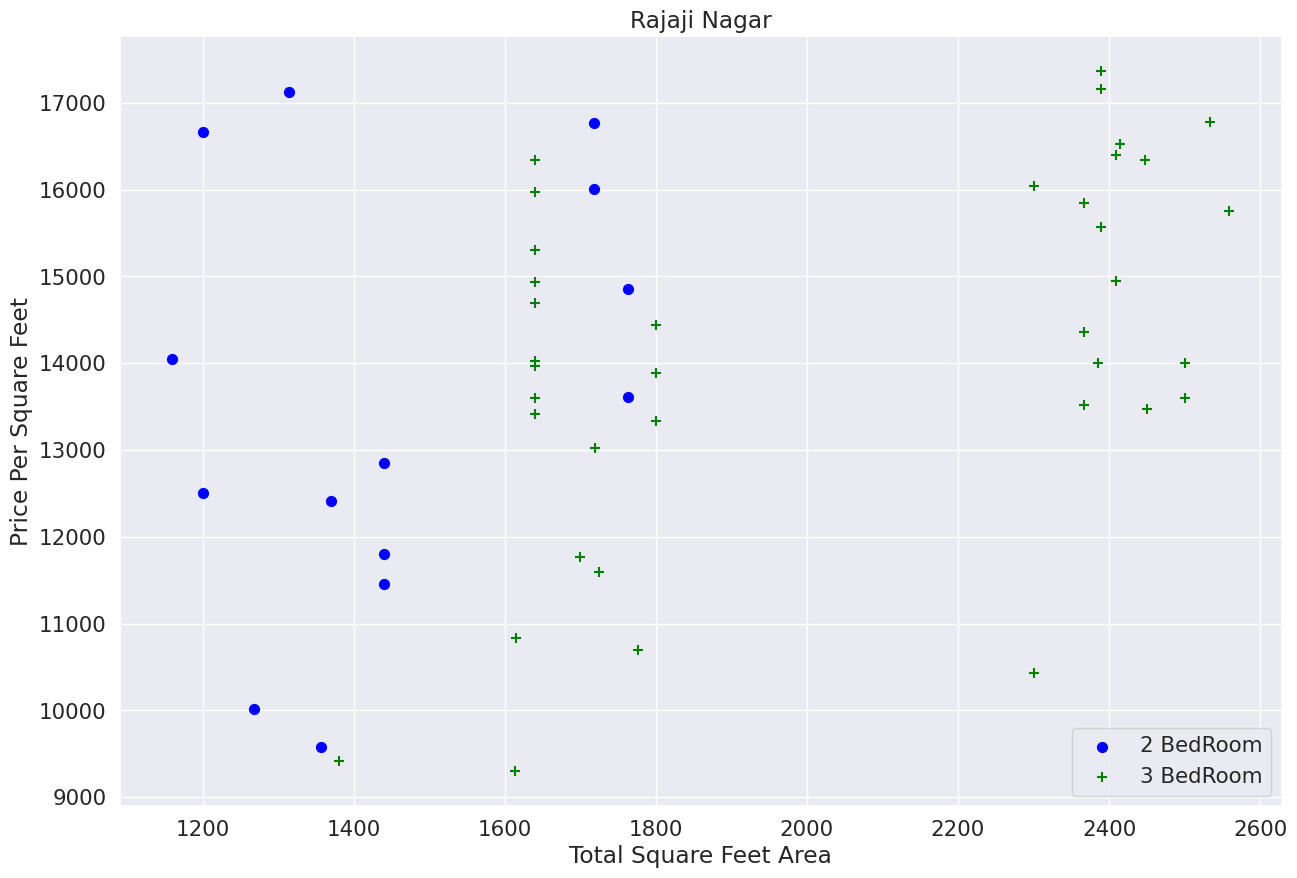

In [169]:
plot_scatter_chart(df_output, 'Rajaji Nagar')

Text(0, 0.5, 'Count')

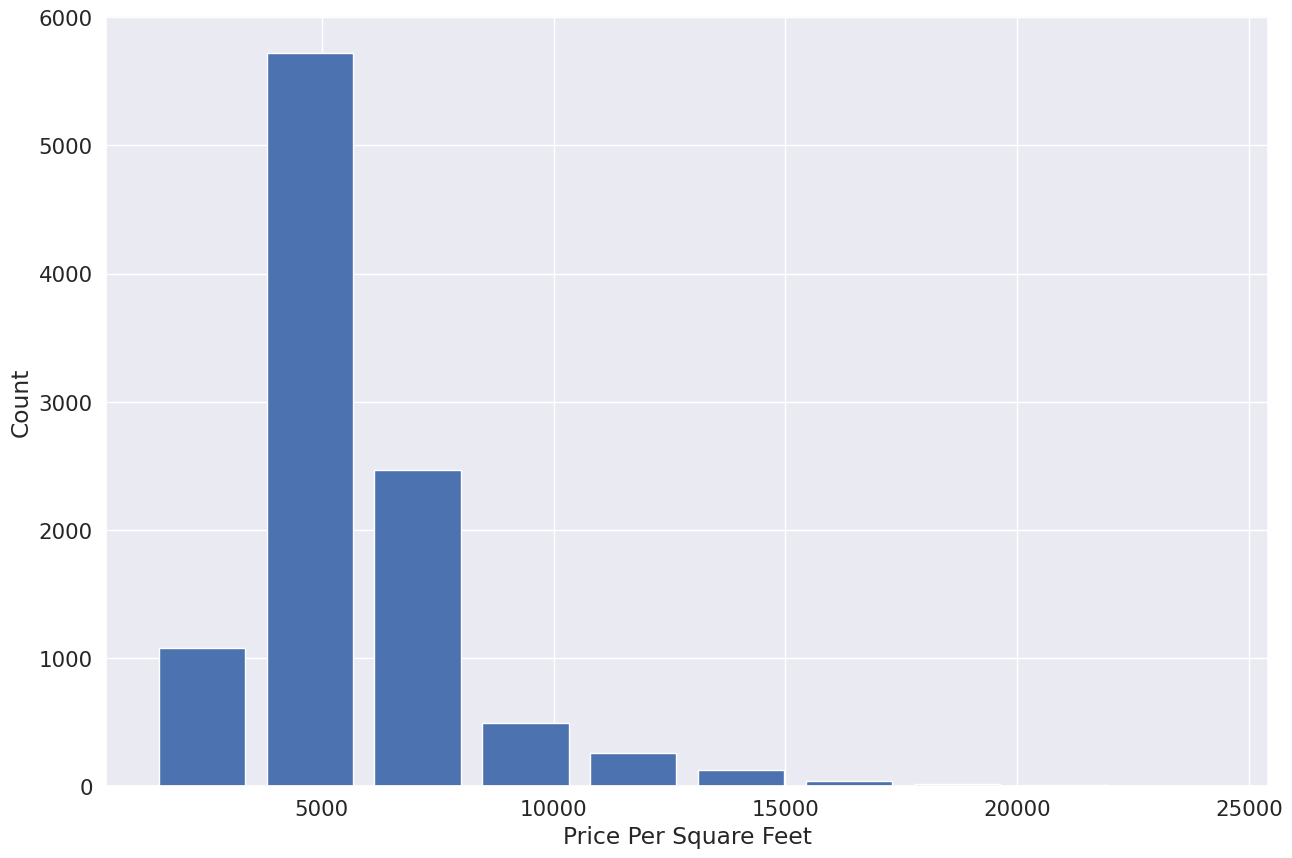

In [170]:
#determine the count for price per square foot area
plt.hist(df_output['Price/Sqft'], rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

In [171]:
#determine the bathroom feature for
df_output.Bathroom.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [172]:
df_output

,Location,Bedroom,Total_Sqft,Bathroom,Price,Price/Sqft
0,1st Block Jayanagar,4,2850.0,4.0,42800000,15017.54
1,1st Block Jayanagar,3,1630.0,3.0,19400000,11901.84
2,1st Block Jayanagar,3,1875.0,2.0,23500000,12533.33
3,1st Block Jayanagar,3,1200.0,2.0,13000000,10833.33
4,1st Block Jayanagar,2,1235.0,2.0,14800000,11983.81
...,...,...,...,...,...,...
10217,Yeshwanthpur,3,1676.0,3.0,9213000,5497.02
10218,Yeshwanthpur,3,2503.0,3.0,13800000,5513.38
10219,Yeshwanthpur,3,1855.0,3.0,13500000,7277.63
10220,Yeshwanthpur,3,1876.0,3.0,16000000,8528.78


In [173]:
df_output[df_output.Bathroom>10]

,Location,Bedroom,Total_Sqft,Bathroom,Price,Price/Sqft
585,BTM 1st Stage,9,3300.0,14.0,50000000,15151.52
5344,Neeladri Nagar,10,4000.0,12.0,16000000,4000.00
5972,Others,10,12000.0,12.0,52500000,4375.00
6058,Others,16,10000.0,16.0,55000000,5500.00
6754,Others,11,6000.0,12.0,15000000,2500.00
7067,Others,13,5425.0,13.0,27500000,5069.12


In [174]:
df_output.shape

(10222, 6)

Text(0, 0.5, 'Count')

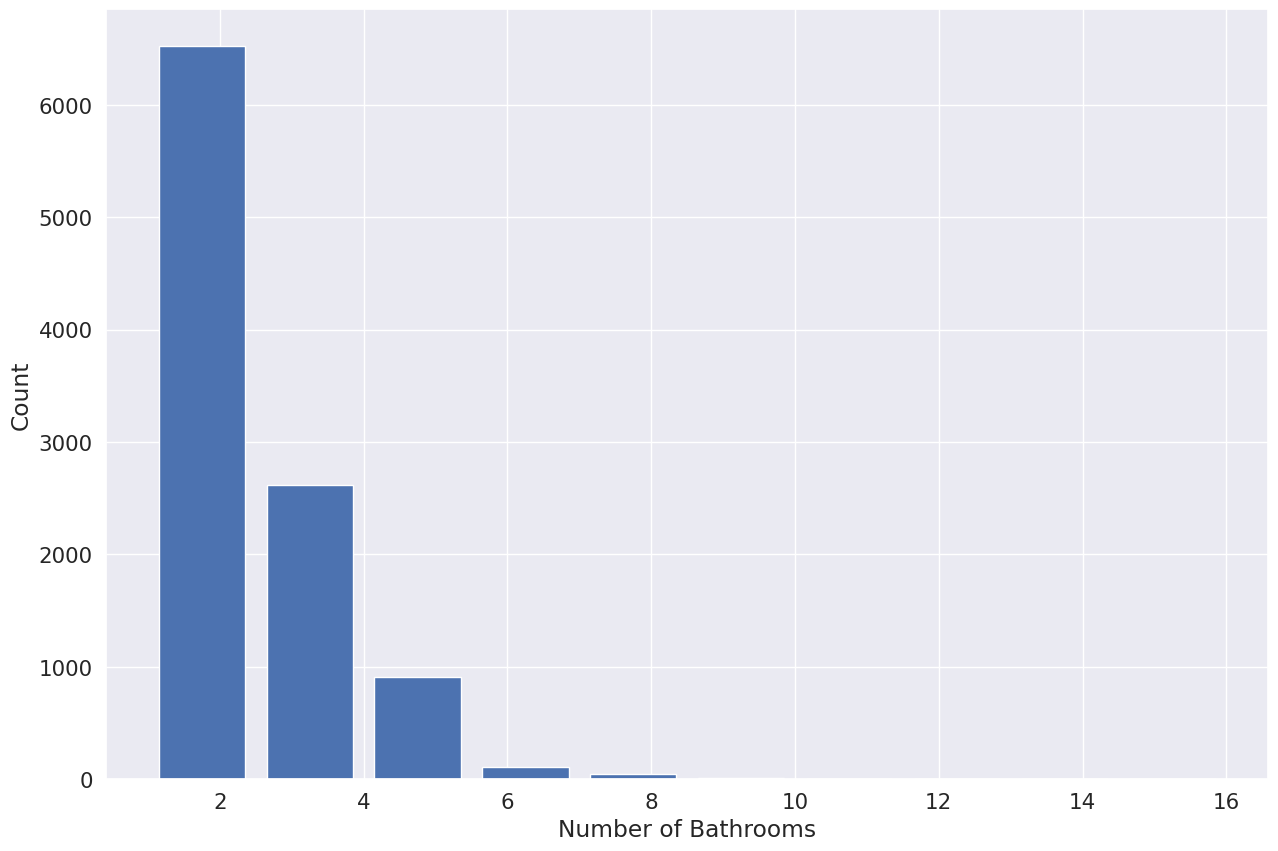

In [175]:
plt.hist(df_output.Bathroom, rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [176]:
# when the No. of bathroom greater than No. of bedroom plus we consider it as outliers
df3 = df_output[df_output.Bathroom - df_output.Bedroom <2]
df3.shape

(10128, 6)

In [177]:
%cd '{result_dir}'
!pwd

/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6PO3OP-Real Estate Price Prediction/result
/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6PO3OP-Real Estate Price Prediction/result


In [178]:
df3.to_csv('S603_Mugged_Data.csv', index=False)